In [20]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('display.max_column',None)
pd.set_option('display.width',1000)
import matplotlib.ticker as mtick
from scipy.optimize import minimize
from sklearn.preprocessing import normalize


In [21]:
# Load and preprocess data
df = pd.read_csv('C:/Users/prakh/Downloads/data.csv', parse_dates=['Date '], index_col='Date ')
df = df.sort_index()
df = df.dropna()
display(df)

,netflix,Tesla,Google,JPMorgan Chase,Berkshire Hathaway,NVDA,AMZN,AAPL,ADBE,MCD,INCT,PEP,KO,V,MA,CSCO,MSFT,BA,PFE,WMT
Date,,,,,,,,,,,,,,,,,,,,
2020-03-02 16:00:00,381.05,49.57,69.32,121.52,217.63,6.91,97.70,74.70,360.28,202.55,58.18,137.58,55.92,192.33,306.74,41.17,172.79,289.27,33.04,38.63
2020-03-03 16:00:00,368.77,49.70,66.89,116.96,208.81,6.65,95.45,72.33,348.34,199.51,55.97,135.58,56.06,185.73,292.00,40.04,164.51,280.62,32.49,37.64
2020-03-04 16:00:00,383.79,49.97,69.08,119.85,217.86,7.11,98.79,75.69,363.85,207.02,58.68,142.39,58.92,194.29,302.36,41.39,170.55,283.12,34.48,38.92
2020-03-05 16:00:00,372.78,48.30,65.74,113.97,208.96,6.83,96.20,73.23,351.03,198.32,56.96,138.10,56.74,186.96,290.73,39.57,166.27,260.37,33.59,38.64
2020-03-06 16:00:00,368.97,46.90,64.79,108.08,205.98,6.65,95.05,72.26,336.77,198.86,55.77,137.26,55.26,184.36,287.01,39.68,161.57,262.33,33.18,39.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 16:00:00,613.12,364.65,147.91,158.16,296.67,30.95,169.67,180.33,577.68,268.24,51.94,171.47,58.65,217.63,360.31,63.42,342.45,203.17,59.20,46.92
2021-12-28 16:00:00,610.71,362.82,146.69,158.64,298.29,30.32,170.66,179.29,569.36,267.88,51.76,172.36,58.88,218.05,360.78,63.53,341.25,206.13,58.01,47.59
2021-12-29 16:00:00,610.54,362.06,146.66,158.56,299.46,30.00,169.20,179.38,569.29,268.49,51.83,172.97,58.95,218.17,361.29,63.96,341.95,203.66,57.58,47.57


In [22]:
# Calculate log returns
returns = np.log(df / df.shift(1)).dropna()
returns.describe()

,netflix,Tesla,Google,JPMorgan Chase,Berkshire Hathaway,NVDA,AMZN,AAPL,ADBE,MCD,INCT,PEP,KO,V,MA,CSCO,MSFT,BA,PFE,WMT
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.000987,0.004226,0.001588,0.000571,0.000685,0.003121,0.001152,0.001866,0.000978,0.000604,-0.000263,0.000503,0.000123,0.000257,0.000341,0.000929,0.001435,-0.000781,0.001251,0.000478
std,0.025127,0.044883,0.020464,0.026561,0.017238,0.032792,0.020278,0.023446,0.025700,0.019566,0.028113,0.018007,0.017205,0.021891,0.025454,0.020613,0.021648,0.043493,0.020054,0.015793
min,-0.118095,-0.236518,-0.123627,-0.162106,-0.100838,-0.203813,-0.082508,-0.137713,-0.159525,-0.172871,-0.198957,-0.121358,-0.101728,-0.145571,-0.136111,-0.118615,-0.159453,-0.272444,-0.080608,-0.095100
25%,-0.010619,-0.019148,-0.006859,-0.010915,-0.006216,-0.012412,-0.009551,-0.008277,-0.008937,-0.005416,-0.010408,-0.005163,-0.005674,-0.009115,-0.010506,-0.007238,-0.007438,-0.017770,-0.008404,-0.006422
50%,0.001388,0.002703,0.002763,-0.000124,0.001227,0.003084,0.001452,0.001497,0.003071,0.000907,0.000092,0.000804,0.000698,0.000595,0.000574,0.000625,0.001213,-0.002629,0.000000,-0.000204
75%,0.013083,0.026108,0.011434,0.012628,0.008064,0.022685,0.011642,0.014103,0.014471,0.007819,0.011509,0.007039,0.007387,0.010608,0.012989,0.009038,0.010928,0.014863,0.009333,0.006868
max,0.155758,0.179324,0.088285,0.165620,0.109840,0.157903,0.076286,0.113081,0.163133,0.166577,0.178324,0.121656,0.062783,0.129647,0.153673,0.125517,0.132929,0.217678,0.103055,0.110545


In [23]:
# Check for missing values 
print(df.isnull().sum())

netflix                0
Tesla                  0
Google                 0
JPMorgan Chase         0
 Berkshire Hathaway    0
NVDA                   0
AMZN                   0
AAPL                   0
ADBE                   0
MCD                    0
INCT                   0
PEP                    0
KO                     0
V                      0
MA                     0
CSCO                   0
MSFT                   0
BA                     0
PFE                    0
WMT                    0
dtype: int64


In [24]:
# Use sklearn PCA for variance explained
cov_matrix = returns.cov()
pca = PCA()
pca.fit(returns)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


  Principal Component  Explained Variance Ratio  Cumulative Variance
0                 PC1                    0.5160               0.5160
1                 PC2                    0.1366               0.6526
2                 PC3                    0.0993               0.7519
3                 PC4                    0.0415               0.7934
4                 PC5                    0.0313               0.8247
5                 PC6                    0.0271               0.8518
6                 PC7                    0.0245               0.8763
7                 PC8                    0.0191               0.8953
8                 PC9                    0.0159               0.9112
9                PC10                    0.0151               0.9263


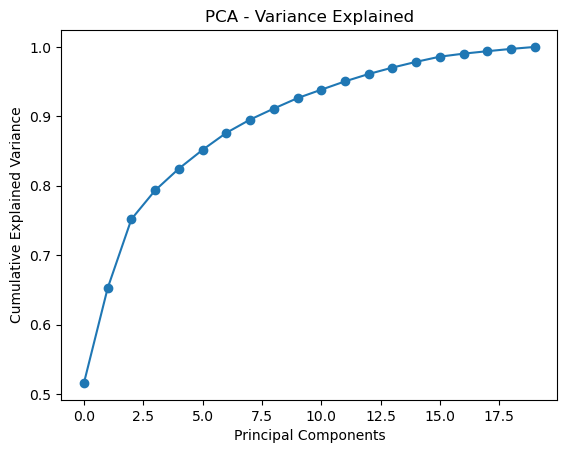

In [25]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
variance_table = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': np.round(explained_variance, 4),
    'Cumulative Variance': np.round(cumulative_variance, 4)
})
print(variance_table.head(10))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.show()


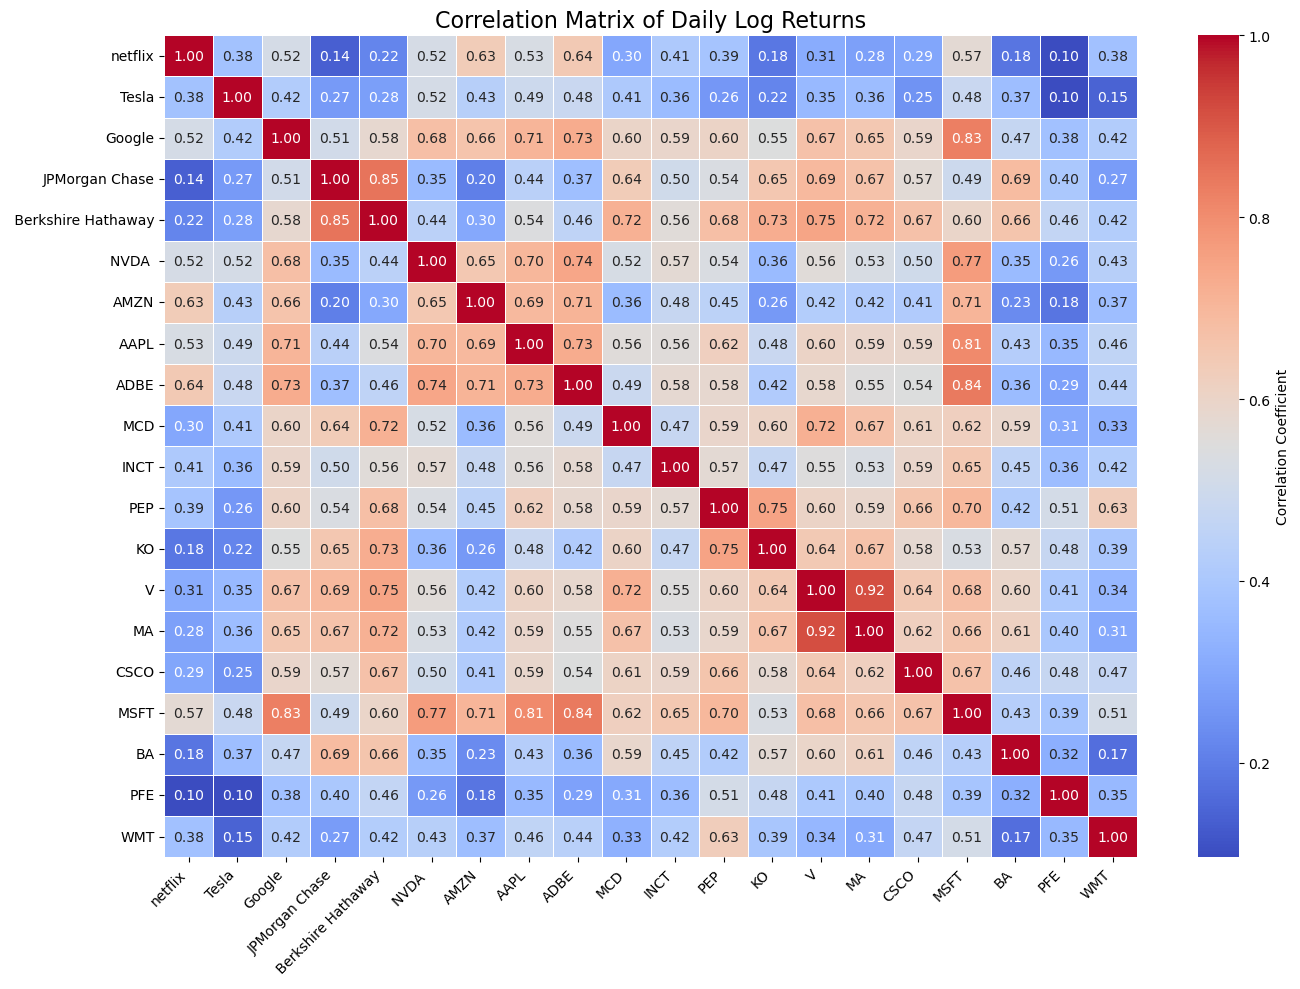


 Top Positively and Negatively Correlated Stock Pairs:

        Type              Stock 1              Stock 2  Correlation
0   Positive                    V                   MA     0.917697
1   Positive       JPMorgan Chase   Berkshire Hathaway     0.848675
2   Positive                 ADBE                 MSFT     0.840297
3   Positive               Google                 MSFT     0.828883
4   Positive                 AAPL                 MSFT     0.807570
5   Positive                NVDA                  MSFT     0.768092
6   Positive                  PEP                   KO     0.750582
7   Positive   Berkshire Hathaway                    V     0.747622
8   Positive                NVDA                  ADBE     0.743843
9   Positive               Google                 ADBE     0.731350
10  Negative              netflix                  PFE     0.096120
11  Negative                Tesla                  PFE     0.097197
12  Negative              netflix       JPMorgan Chase     

In [26]:
# Correlation and covariance matrices
correlation_matrix = returns.corr()
plt.figure(figsize=(14, 10))  # Wider figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix of Daily Log Returns", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Convert to form
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Stock 1', 'Stock 2', 'Correlation']

# Remove  duplicates
corr_pairs = corr_pairs[corr_pairs['Stock 1'] != corr_pairs['Stock 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

# Top 10 positive and top 10 negative correlations
top_positive = corr_pairs.sort_values(by='Correlation', ascending=False).head(10).copy()
top_positive['Type'] = 'Positive'

top_negative = corr_pairs.sort_values(by='Correlation', ascending=True).head(10).copy()
top_negative['Type'] = 'Negative'

# Combine
highlighted_corrs = pd.concat([top_positive, top_negative], ignore_index=True)
highlighted_corrs = highlighted_corrs[['Type', 'Stock 1', 'Stock 2', 'Correlation']]

# Show result
print("\n Top Positively and Negatively Correlated Stock Pairs:\n")
print(highlighted_corrs)


In [27]:
# Reduce dimensions
k = 3
returns_reduced = pca.transform(returns)[:, :k]
eigenportfolios = eigenvectors.T


  Variance Explained by Each Eigenportfolio:

   Eigenportfolio #  Variance Explained (%)  Cumulative Variance (%)
0               EP1                   51.60                    51.60
1               EP2                   13.66                    65.26
2               EP3                    9.93                    75.19
3               EP4                    4.15                    79.34
4               EP5                    3.13                    82.47
5               EP6                    2.71                    85.18
6               EP7                    2.45                    87.63
7               EP8                    1.91                    89.53
8               EP9                    1.59                    91.12
9              EP10                    1.51                    92.63
10             EP11                    1.21                    93.84
11             EP12                    1.20                    95.04
12             EP13                    1.06             

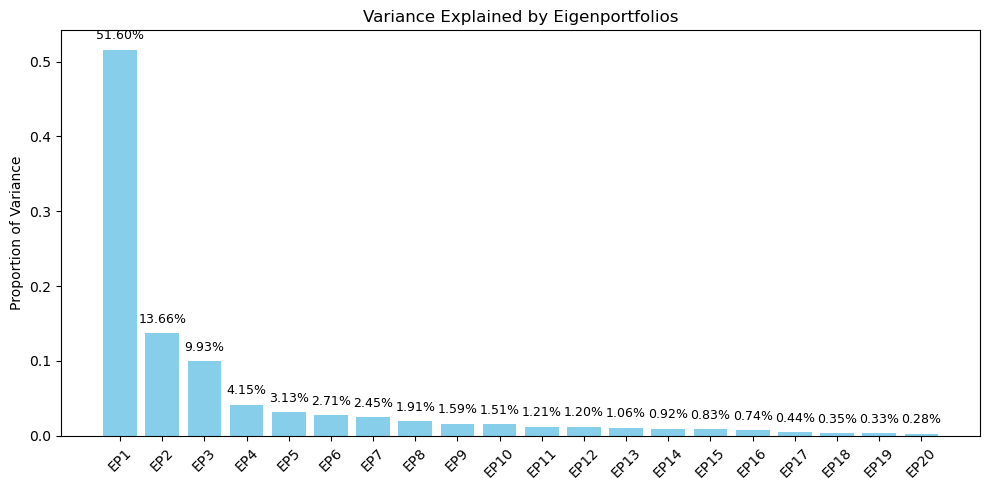

In [28]:
# Calculate variance explained by eigenportfolios
normalized_portfolios = np.array([normalize(w.reshape(1, -1))[0] for w in eigenportfolios])

portfolio_returns = returns @ normalized_portfolios.T
portfolio_variances = np.var(portfolio_returns, axis=0)
variance_explained = portfolio_variances / np.sum(portfolio_variances)

# Cumulative variance
cumulative_variance = np.cumsum(variance_explained)

# Create table
eigen_table = pd.DataFrame({
    'Eigenportfolio #': [f'EP{i+1}' for i in range(len(variance_explained))],
    'Variance Explained (%)': np.round(variance_explained * 100, 2),
    'Cumulative Variance (%)': np.round(cumulative_variance * 100, 2)
})

# Display table
print("\n  Variance Explained by Each Eigenportfolio:\n")
print(eigen_table)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(eigen_table['Eigenportfolio #'], variance_explained, color='skyblue')
plt.title('Variance Explained by Eigenportfolios')
plt.ylabel('Proportion of Variance')
plt.xticks(rotation=45)

# % labels on top of bars
for bar, value in zip(bars, variance_explained):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{value:.2%}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



 Minimum Variance Portfolio (MVP) Weights:

                  Stock  MVP Weight (%)
19                  WMT         33.0143
4    Berkshire Hathaway         32.7498
12                   KO         32.0248
6                  AMZN         30.2274
9                   MCD         17.6627
18                  PFE         16.9834
13                    V         11.1913
0               netflix          8.0866
1                 Tesla          2.9685
2                Google          2.6698
15                 CSCO          0.7605
8                  ADBE         -3.2977
10                 INCT         -3.4916
17                   BA         -7.0599
7                  AAPL         -8.2202
3        JPMorgan Chase         -8.4745
5                 NVDA          -8.7138
16                 MSFT        -12.5841
14                   MA        -13.6496
11                  PEP        -22.8477


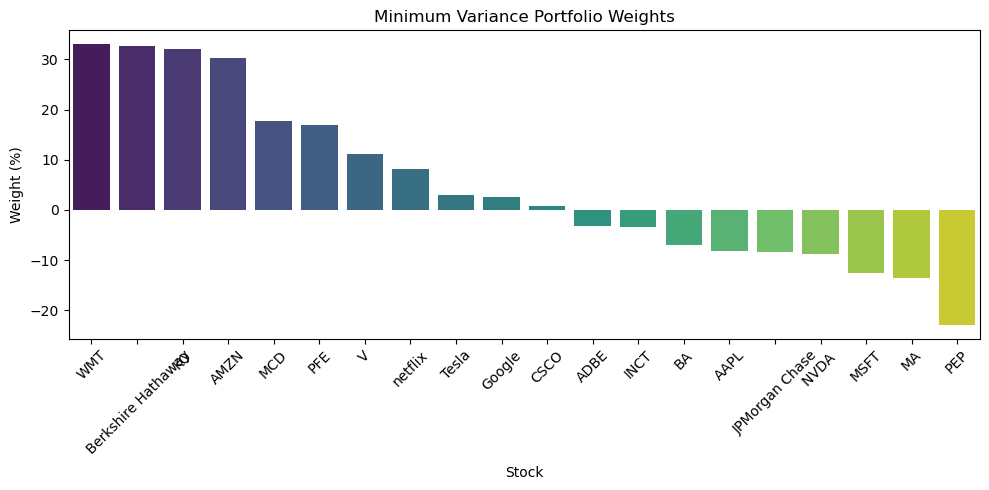

In [29]:
# the inverse of the covariance matrix
inv_cov = np.linalg.inv(cov_matrix)

# a vector of ones (for equal weights constraint)
ones = np.ones(len(cov_matrix))

#  Compute MVP weights using the formula:
# w_mvp = (Σ⁻¹1) / (1ᵗΣ⁻¹1)
w_mvp = inv_cov @ ones
w_mvp /= ones.T @ inv_cov @ ones

#  a DataFrame to display weights nicely
mvp_weights = pd.DataFrame({
    'Stock': df.columns,
    'MVP Weight (%)': np.round(w_mvp * 100, 4)
}).sort_values(by='MVP Weight (%)', ascending=False)

# Display the weights
print("\n Minimum Variance Portfolio (MVP) Weights:\n")
print(mvp_weights)


# Plot MVP weights
plt.figure(figsize=(10, 5))
sns.barplot(data=mvp_weights, x='Stock', y='MVP Weight (%)', palette='viridis')
plt.title("Minimum Variance Portfolio Weights")
plt.ylabel("Weight (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



📊 Equal Weight Portfolio Weights:

                  Stock  Equal Weight (%)
0               netflix               5.0
1                 Tesla               5.0
2                Google               5.0
3        JPMorgan Chase               5.0
4    Berkshire Hathaway               5.0
5                 NVDA                5.0
6                  AMZN               5.0
7                  AAPL               5.0
8                  ADBE               5.0
9                   MCD               5.0
10                 INCT               5.0
11                  PEP               5.0
12                   KO               5.0
13                    V               5.0
14                   MA               5.0
15                 CSCO               5.0
16                 MSFT               5.0
17                   BA               5.0
18                  PFE               5.0
19                  WMT               5.0


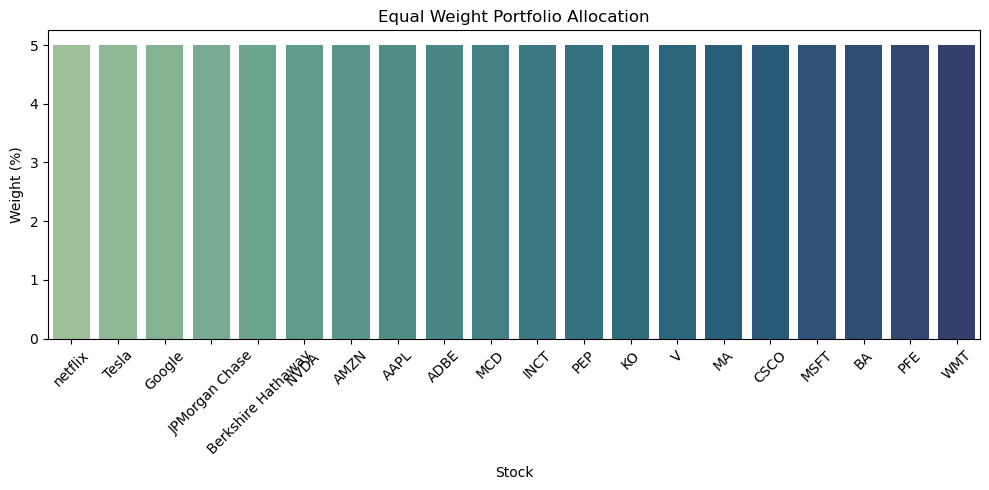

In [30]:
# equal weights
n_assets = len(df.columns)
equal_weights = np.ones(n_assets) / n_assets

#  a DataFrame of weights for clarity
equal_weight_df = pd.DataFrame({
    'Stock': df.columns,
    'Equal Weight (%)': np.round(equal_weights * 100, 2)
})

# Display the weights
print("\n📊 Equal Weight Portfolio Weights:\n")
print(equal_weight_df)

#  Plot Equal Weights
plt.figure(figsize=(10, 5))
sns.barplot(data=equal_weight_df, x='Stock', y='Equal Weight (%)', palette='crest')
plt.title("Equal Weight Portfolio Allocation")
plt.ylabel("Weight (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



  Portfolio Return Statistics:

              MVP  Top Eigenportfolio  Equal Weight
count  464.000000          464.000000    464.000000
mean     0.000589            0.004683      0.001003
std      0.010804            0.082286      0.017519
min     -0.071935           -0.661373     -0.139795
25%     -0.005074           -0.022497     -0.005156
50%      0.000539            0.009408      0.001990
75%      0.006364            0.039119      0.008506
max      0.047074            0.428639      0.096566


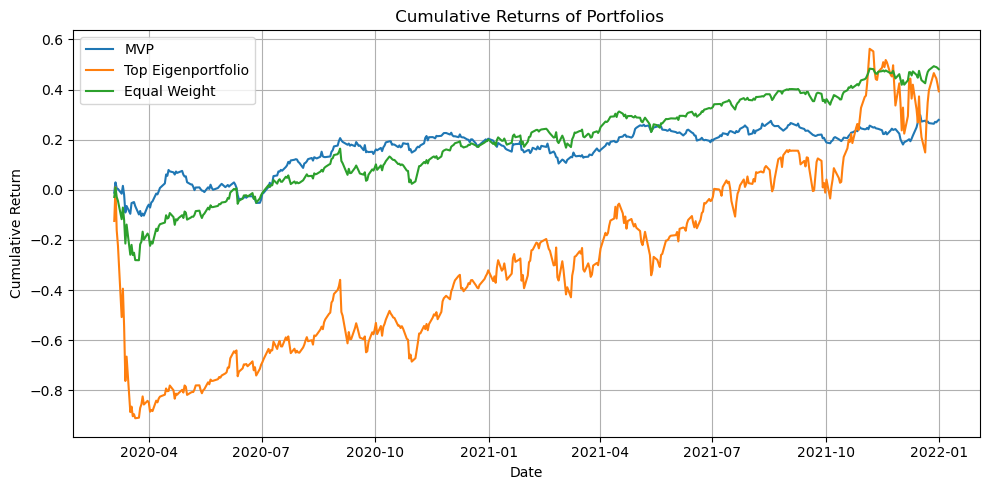

In [31]:
#  Minimum Variance Portfolio
portfolio_mvp = returns @ w_mvp

#  Top Eigenportfolio (Highest eigenvalue = first component, not last)
top_eigenportfolio_vector = eigenvectors[:, 0]  
top_eigenportfolio = returns @ top_eigenportfolio_vector

# Equal Weight Portfolio
portfolio_equal = returns @ equal_weights

# DataFrame of portfolio returns
portfolio_returns_df = pd.DataFrame({
    'Date': returns.index,
    'MVP': portfolio_mvp,
    'Top Eigenportfolio': top_eigenportfolio,
    'Equal Weight': portfolio_equal
}).set_index('Date')

# Print summary statistics
print("\n  Portfolio Return Statistics:\n")
print(portfolio_returns_df.describe())

#  Cumulative Returns Plot
portfolio_cumulative = (1 + portfolio_returns_df).cumprod() - 1

plt.figure(figsize=(10, 5))
for col in portfolio_cumulative.columns:
    plt.plot(portfolio_cumulative.index, portfolio_cumulative[col], label=col)

plt.title(" Cumulative Returns of Portfolios")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Assume annual risk-free rate of 3.5%
annual_rf = 0.035

#  Convert to daily (252 trading days in a year)
risk_free_rate_daily = annual_rf / 252

print(f"Daily Risk-Free Rate: {risk_free_rate_daily:.6f}")


Daily Risk-Free Rate: 0.000139


In [36]:
# Sharpe Ratio function with both daily /  annualized output
def sharpe_ratio(returns, rf=risk_free_rate_daily, annualize=True):
    excess_returns = returns - rf
    mean_daily = excess_returns.mean()
    std_daily = excess_returns.std()
    
    daily_sharpe = mean_daily / std_daily
    
    if annualize:
        annual_sharpe = daily_sharpe * np.sqrt(252)
        return round(mean_daily, 6), round(std_daily, 6), round(daily_sharpe, 4), round(annual_sharpe, 4)
    else:
        return round(mean_daily, 6), round(std_daily, 6), round(daily_sharpe, 4), None



# Dictionary of portfolios
portfolios = {
    'MVP': portfolio_mvp,
    'Top Eigenportfolio': top_eigenportfolio,
    'Equal Weight': portfolio_equal
}

# Store results
sharpe_results = []

for name, ret in portfolios.items():
    mean, std, daily_sharpe, annual_sharpe = sharpe_ratio(ret)
    sharpe_results.append({
        'Portfolio': name,
        'Mean Daily Return': mean,
        'Standard Deviation': std,
        'Daily Sharpe': daily_sharpe,
        'Annualized Sharpe': annual_sharpe
    })

# Create DataFrame
sharpe_df = pd.DataFrame(sharpe_results)
# Reorder columns and format nicely
sharpe_df = sharpe_df[
    ['Portfolio', 'Mean Daily Return', 'Standard Deviation', 'Daily Sharpe', 'Annualized Sharpe']
]
# Format numbers to 4 decimal places
sharpe_df['Mean Daily Return'] = sharpe_df['Mean Daily Return'].map('{:.6f}'.format)
sharpe_df['Standard Deviation'] = sharpe_df['Standard Deviation'].map('{:.6f}'.format)
sharpe_df['Daily Sharpe'] = sharpe_df['Daily Sharpe'].map('{:.4f}'.format)
sharpe_df['Annualized Sharpe'] = sharpe_df['Annualized Sharpe'].map('{:.4f}'.format)

# Display table
print("\n Portfolio Risk & Return Metrics:\n")
display(sharpe_df)






 Portfolio Risk & Return Metrics:



,Portfolio,Mean Daily Return,Standard Deviation,Daily Sharpe,Annualized Sharpe
0,MVP,0.000450,0.010804,0.0416,0.6611
1,Top Eigenportfolio,0.004544,0.082286,0.0552,0.8767
2,Equal Weight,0.000864,0.017519,0.0493,0.7827


C:\Users\prakh\AppData\Local\Temp\ipykernel_22192\4126597368.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\prakh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


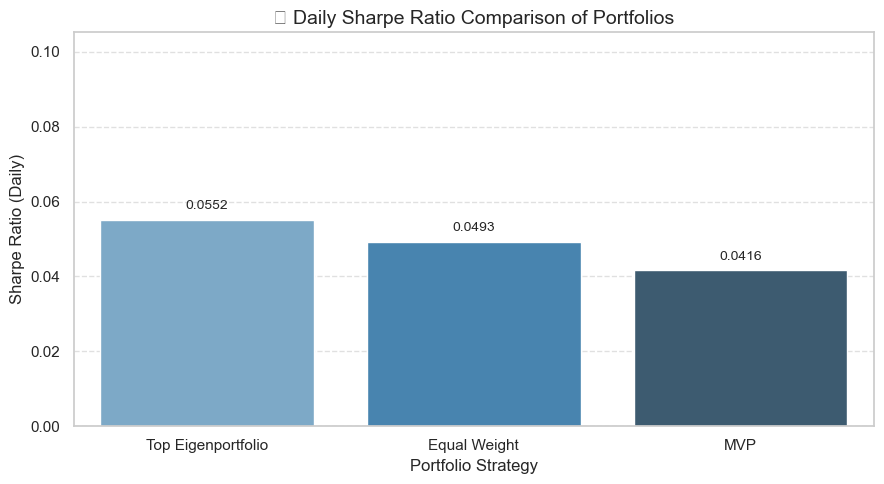

,Portfolio,Mean Daily Return,Standard Deviation,Daily Sharpe,Annualized Sharpe
0,MVP,0.000450,0.010804,0.0416,0.6611
1,Top Eigenportfolio,0.004544,0.082286,0.0552,0.8767
2,Equal Weight,0.000864,0.017519,0.0493,0.7827


In [40]:
# Recreate DataFrame without formatting
sharpe_df = pd.DataFrame(sharpe_results)

# Plot without converting to string
sns.set(style="whitegrid")

# Sort by Sharpe Ratio (numeric)
sharpe_df_sorted = sharpe_df.sort_values(by='Daily Sharpe', ascending=False)

# Plot
plt.figure(figsize=(9, 5))
barplot = sns.barplot(x='Portfolio', y='Daily Sharpe', data=sharpe_df_sorted, palette='Blues_d')

# Add value labels (formatted nicely, but values remain numeric)
for i, value in enumerate(sharpe_df_sorted['Daily Sharpe']):
    plt.text(i, value + 0.002, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

# Labels and styling
plt.title("📈 Daily Sharpe Ratio Comparison of Portfolios", fontsize=14)
plt.xlabel("Portfolio Strategy", fontsize=12)
plt.ylabel("Sharpe Ratio (Daily)", fontsize=12)
plt.ylim(0, sharpe_df_sorted['Daily Sharpe'].max() + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# For table display only
display(sharpe_df.style.format({
    'Mean Daily Return': "{:.6f}",
    'Standard Deviation': "{:.6f}",
    'Daily Sharpe': "{:.4f}",
    'Annualized Sharpe': "{:.4f}"
}))




In [41]:
# Objective: Negative Sharpe (to maximize it via minimize)
def neg_sharpe_ratio(weights, mu, cov, rf):
    port_return = np.dot(weights, mu)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    return -(port_return - rf) / port_volatility
mu = returns.mean() * 252
cov = returns.cov() * 252
n_assets = len(mu)
initial_weights = np.ones(n_assets) / n_assets
bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

result = minimize(
    neg_sharpe_ratio,
    initial_weights,
    args=(mu, cov, annual_rf),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

markowitz_weights = result.x

In [42]:
portfolio_markowitz = returns @ markowitz_weights


In [43]:
portfolio_returns_df['Markowitz'] = portfolio_markowitz


In [44]:
portfolio_cumulative = (1 + portfolio_returns_df).cumprod() - 1


In [49]:
portfolios = {
    'MVP': portfolio_mvp,
    'Top Eigenportfolio': top_eigenportfolio,
    'Equal Weight': portfolio_equal,
    'Markowitz': portfolio_markowitz
}



,Stock,Markowitz Weight (%)
0,PFE,38.70
1,NVDA,31.89
2,Tesla,29.41


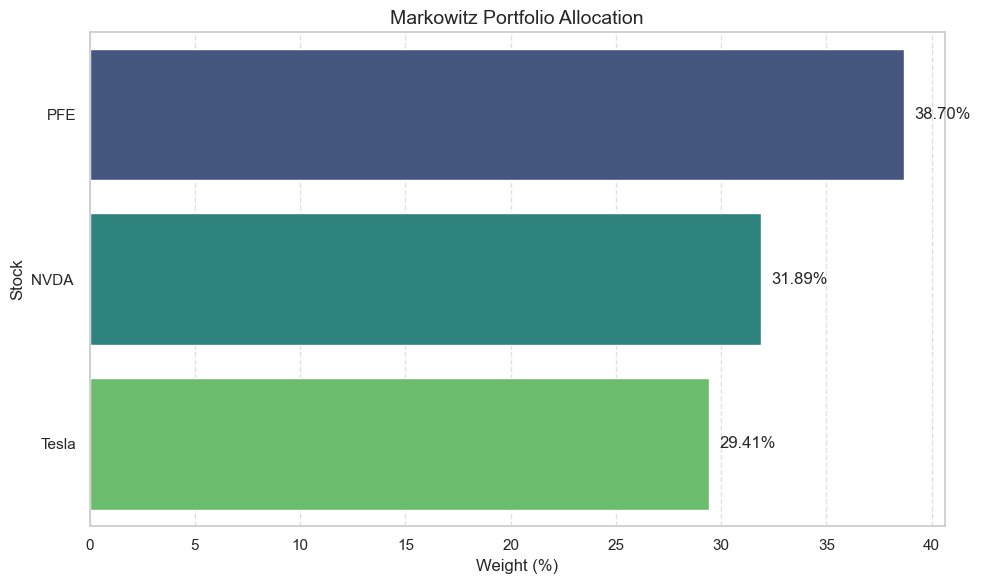

In [52]:
# Sort weights and format
markowitz_df = pd.DataFrame({
    'Stock': df.columns,
    'Markowitz Weight (%)': np.round(markowitz_weights * 100, 2)  # Assuming `markowitz_weights` is your numpy array
})

# Filter non-zero weights only
markowitz_df = markowitz_df[markowitz_df['Markowitz Weight (%)'] > 0]

# Sort by weight descending
markowitz_df = markowitz_df.sort_values(by='Markowitz Weight (%)', ascending=False).reset_index(drop=True)

# Display neatly
display(markowitz_df.style.set_caption("Markowitz Portfolio Weights").format({
    'Markowitz Weight (%)': "{:.2f}"
}))
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Markowitz Weight (%)', 
    y='Stock', 
    data=markowitz_df, 
    palette='viridis'
)

# Add weight labels
for i, row in markowitz_df.iterrows():
    plt.text(row['Markowitz Weight (%)'] + 0.5, i, f"{row['Markowitz Weight (%)']:.2f}%", va='center')

plt.title("Markowitz Portfolio Allocation", fontsize=14)
plt.xlabel("Weight (%)", fontsize=12)
plt.ylabel("Stock", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [53]:
# Combine weights into a single DataFrame
comparison_df = pd.DataFrame({
    'Stock': df.columns,
    'Markowitz': markowitz_weights * 100,
    'MVP': w_mvp * 100,
    'Equal Weight': equal_weights * 100
})

# Reshape to long-form for seaborn
comparison_long = comparison_df.melt(id_vars='Stock', var_name='Portfolio Type', value_name='Weight (%)')

# Filter out 0% weights (optional, for cleaner plot)
comparison_long = comparison_long[comparison_long['Weight (%)'] > 0]


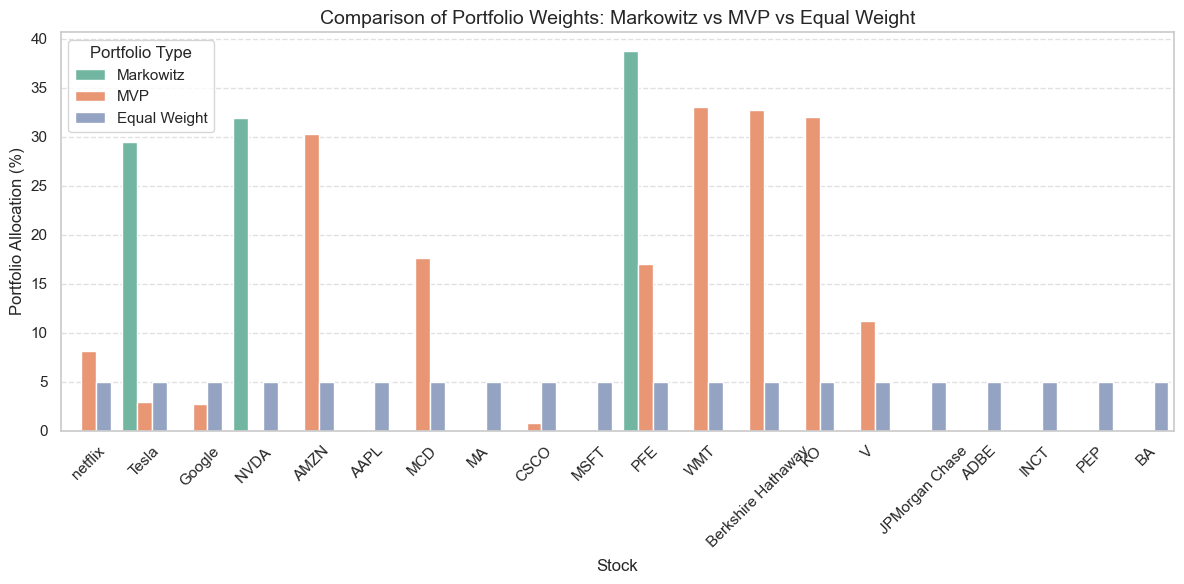

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparison_long,
    x='Stock',
    y='Weight (%)',
    hue='Portfolio Type',
    palette='Set2'
)

plt.title("Comparison of Portfolio Weights: Markowitz vs MVP vs Equal Weight", fontsize=14)
plt.xlabel("Stock", fontsize=12)
plt.ylabel("Portfolio Allocation (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Portfolio Type")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


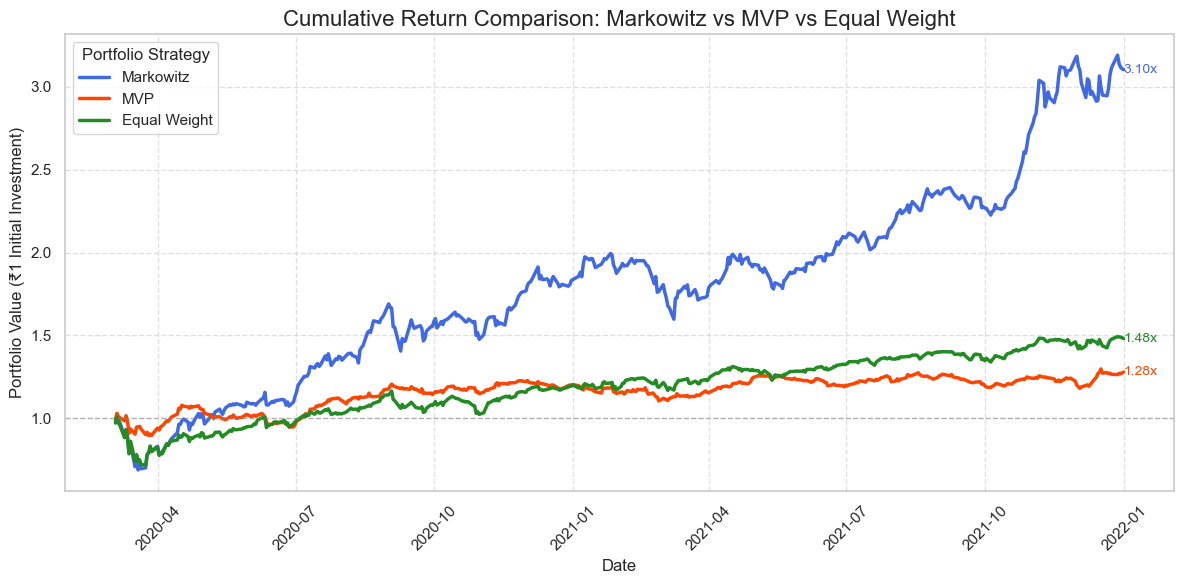


 Final Portfolio Comparison:



,Portfolio,Final Value (₹),Return (%)
0,Markowitz,3.104420,210.44
2,Equal Weight,1.481109,48.11
1,MVP,1.278992,27.90


In [61]:
# --------------------------------------------------------
# Cumulative Return Comparison: Markowitz vs MVP vs Equal Weight
# --------------------------------------------------------

# STEP 1: Calculate cumulative returns (if not done already)
# This assumes daily returns for each portfolio are already defined as:
# portfolio_markowitz, portfolio_mvp, portfolio_equal

cumulative_returns = pd.DataFrame({
    'Markowitz': (1 + portfolio_markowitz).cumprod(),
    'MVP': (1 + portfolio_mvp).cumprod(),
    'Equal Weight': (1 + portfolio_equal).cumprod()
})

# STEP 2: Plot cumulative returns for visual comparison
plt.figure(figsize=(12, 6))

# Color coding for each portfolio
colors = {
    'Markowitz': 'royalblue',
    'MVP': 'orangered',
    'Equal Weight': 'forestgreen'
}

# Line plot for each strategy
for col in cumulative_returns.columns:
    plt.plot(
        cumulative_returns.index,
        cumulative_returns[col],
        label=col,
        color=colors[col],
        linewidth=2.5
    )
    # Add final value as label at the end
    plt.text(
        cumulative_returns.index[-1],
        cumulative_returns[col].iloc[-1],
        f'{cumulative_returns[col].iloc[-1]:.2f}x',
        fontsize=10,
        color=colors[col],
        va='center',
        ha='left'
    )

# Axis labels and title
plt.title("Cumulative Return Comparison: Markowitz vs MVP vs Equal Weight", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value (₹1 Initial Investment)", fontsize=12)

# Legend and grid
plt.legend(title="Portfolio Strategy", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#-----------------------------------------------------------------
#This graph visualizes the performance of three portfolio strategies:
#1. Markowitz Mean-Variance Optimal Portfolio
#2. Minimum Variance Portfolio (MVP)
#3. Equal Weight Portfolio

#-------------------------------------------------------------------
#Each line tracks how ₹1 invested at the beginning grows over time under each strategy. 
#This helps in comparing overall performance visually and evaluating consistency, volatility, 
#and total return of each method.
#-----------------------------------------------------------------------
#Key Insight:
#- A higher ending value (e.g., #1.55x) means that ₹1 grew to ₹1.55.
#- Markowitz often targets maximum Sharpe ratio, MVP minimizes risk, 
 # and Equal Weight ensures diversification without optimization.
#----------------------------------------------------------------------

# --------------------------------------------------------
# Create a Comparison Table of Final Portfolio Values
# --------------------------------------------------------

final_values = cumulative_returns.iloc[-1].reset_index()
final_values.columns = ['Portfolio', 'Final Value (₹)']
final_values['Return (%)'] = ((final_values['Final Value (₹)'] - 1) * 100).round(2)

print("\n Final Portfolio Comparison:\n")
display(final_values.sort_values(by='Return (%)', ascending=False))


